In [1]:
!pwd

/Users/Puneetha_Pai/learning/kaggle/notebooks


In [2]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
PATH = '../data/titanic/'
! ls {PATH}

gender_submission.csv test.csv              train.csv
submission.csv        titanic.zip


In [5]:
df_raw = pd.read_csv(f'{PATH}train.csv')

In [6]:
df_raw.head().T

,0,1,2,3,4
PassengerId,1,2,3,4,5
Survived,0,1,1,1,0
Pclass,3,1,3,1,3
Name,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Th...","Heikkinen, Miss. Laina","Futrelle, Mrs. Jacques Heath (Lily May Peel)","Allen, Mr. William Henry"
Sex,male,female,female,female,male
Age,22,38,26,35,35
SibSp,1,1,0,1,0
Parch,0,0,0,0,0
Ticket,A/5 21171,PC 17599,STON/O2. 3101282,113803,373450
Fare,7.25,71.2833,7.925,53.1,8.05


In [7]:
df_raw.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
from utils.structured import train_cats, apply_cats, proc_df

/Users/Puneetha_Pai/.local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


In [9]:
train_cats(df_raw)
df_raw.dtypes

PassengerId       int64
Survived          int64
Pclass            int64
Name           category
Sex            category
Age             float64
SibSp             int64
Parch             int64
Ticket         category
Fare            float64
Cabin          category
Embarked       category
dtype: object

In [10]:
X, y, nas = proc_df(df_raw, y_fld='Survived', skip_flds=['PassengerId', 'Name'])

In [11]:
X.isnull().sum() / X.shape[0]

Pclass      0.0
Sex         0.0
Age         0.0
SibSp       0.0
Parch       0.0
Ticket      0.0
Fare        0.0
Cabin       0.0
Embarked    0.0
Age_na      0.0
dtype: float64

In [12]:
X.shape, y.shape

((891, 10), (891,))

In [13]:
# X.tail().T.merge(pd.Series(X.dtypes, name='type'))
tail = X.tail().T
tail['type'] = pd.Series(X.dtypes, index=tail.index)
tail

,886,887,888,889,890,type
Pclass,2,1,3,1,3,int64
Sex,2,1,1,2,2,int8
Age,27,19,28,26,32,float64
SibSp,0,0,1,0,0,int64
Parch,0,0,2,0,0,int64
Ticket,102,15,676,9,467,int16
Fare,13,30,23.45,30,7.75,float64
Cabin,0,31,0,61,0,int16
Embarked,3,3,3,1,2,int8
Age_na,False,False,True,False,False,bool


In [14]:
from sklearn.ensemble import RandomForestClassifier

In [15]:
rf = RandomForestClassifier(n_estimators=10, n_jobs=-1)

In [16]:
rf.fit(X, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [17]:
rf.score(X, y)

0.9842873176206509

In [19]:
df_test = pd.read_csv(f'{PATH}test.csv')
apply_cats(df_test, X)
X_test, y, nas_test = proc_df(df_test, skip_flds=['PassengerId', 'Name'], na_dict=nas)
X_test.dtypes

Pclass        int64
Sex            int8
Age         float64
SibSp         int64
Parch         int64
Ticket        int16
Fare        float64
Cabin          int8
Embarked       int8
Age_na         bool
dtype: object

In [20]:
nas, nas_test

({'Age': 28.0}, {'Age': 28.0, 'Fare': 14.4542})

In [21]:
predictions = rf.predict(X_test)

In [22]:
result = pd.DataFrame(dict(PassengerId=df_test.PassengerId, Survived=predictions))
result.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [23]:
result.isnull().sum()/result.shape[0]

PassengerId    0.0
Survived       0.0
dtype: float64

In [24]:
result.to_csv(f'{PATH}submission.csv', index=False)

## Keeping Validation Set

In [27]:
df_test = pd.read_csv(f'{PATH}test.csv')
len_test = len(df_test)
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [31]:
df_raw.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


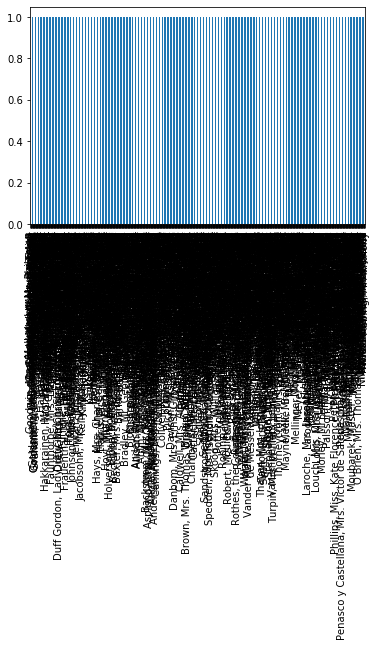

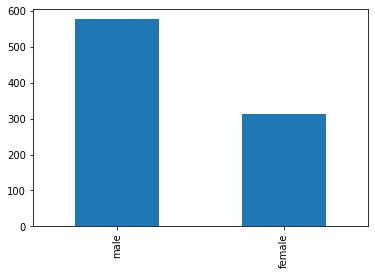

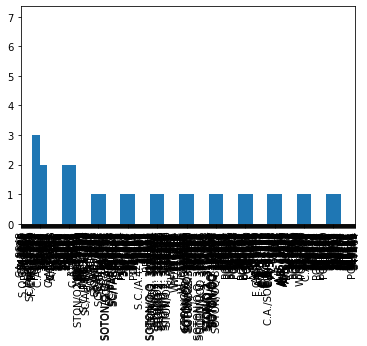

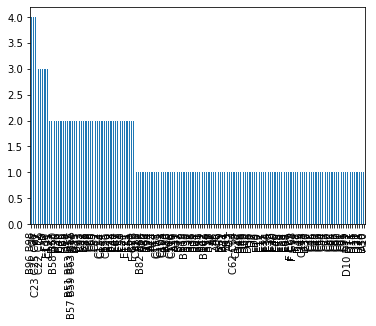

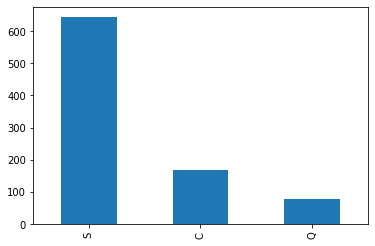

In [43]:
for col, ser in df_raw.items():
    if ser.dtype.name == 'category':
        ser.value_counts().plot(kind='bar')
        plt.show()

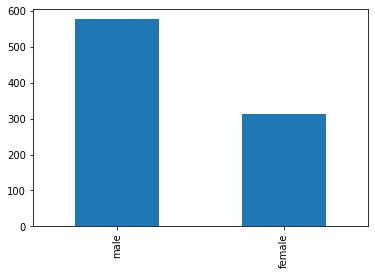

In [41]:
df_raw.Sex.value_counts().plot(kind='bar')